# Structure factors to projected potential

In [2]:
import os
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import matplotlib.image as image
from cmap import Colormap

In [3]:
IMAGE_SIZE = 128
FACTOR = 1 / (IMAGE_SIZE - 1)
TWO_PI_I = complex(0, 2 * np.pi)
data_loc = "../datasets/MiniFDP"

In [4]:
@nb.njit()
def projected_potential(arr, Cug, gVec):
    for i in range(IMAGE_SIZE):
        for j in range(IMAGE_SIZE):
            for n in range(841):  # Number of lines in .txt
                ReDotgVec = i * gVec[n][0] + j * gVec[n][1]
                ExpVar = np.exp(TWO_PI_I * ReDotgVec * FACTOR)
                arr[j][i] += np.real(Cug[n] * ExpVar)

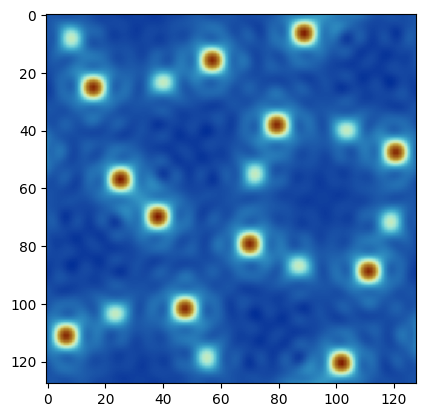

In [54]:
for ICSD_code in map(str, [163414]):
    structure_factors = np.loadtxt(
        os.path.join(data_loc, ICSD_code, ICSD_code + "_structure_factors.txt")
    )
    Cug = np.apply_along_axis(lambda row: complex(row[5], row[6]), 1, structure_factors)
    gVec = np.apply_along_axis(
        lambda row: [row[0], row[1], row[2]], 1, structure_factors
    )

    arr = np.zeros((IMAGE_SIZE, IMAGE_SIZE))
    projected_potential2(arr, Cug, gVec)
    arr = arr / np.max(arr)
    np.save(os.path.join(data_loc, ICSD_code, ICSD_code + "_structure"), arr)
    image.imsave(
        os.path.join(data_loc, ICSD_code, ICSD_code + "_structure.png"),
        arr,
        cmap="Greys",
    )
    plt.imshow(arr, cmap=Colormap('crameri:roma_r').to_mpl())

Below is the script used to generate all in the dataset.

In [ ]:
# import os
# import numpy as np
# import numba as nb
# import matplotlib.pyplot as plt
# import matplotlib.image as image

# current_path = os.getcwd()
# data_loc = os.path.join(current_path, "cleaned_data/")
# IMAGE_SIZE = 128
# FACTOR = 1 / (IMAGE_SIZE - 1)
# TWO_PI_I = complex(0, 2 * np.pi)


# @nb.njit()
# def get_lattice(arr, Cug, gVec):
#     for i in range(IMAGE_SIZE):
#         for j in range(IMAGE_SIZE):
#             for n in range(841):  # Number of lines in .txt
#                 ReDotgVec = i * gVec[n][0] + j * gVec[n][1]
#                 ExpVar = np.exp(TWO_PI_I * ReDotgVec * FACTOR)
#                 arr[j][i] += np.real(Cug[n] * ExpVar)


# for i, ICSD_code in enumerate(os.listdir(data_loc)):
#     structure_factors = np.loadtxt(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_structure_factors.txt")
#     )
#     Cug = np.apply_along_axis(lambda row: complex(row[5], row[6]), 1, structure_factors)
#     gVec = np.apply_along_axis(
#         lambda row: [row[0], row[1], row[2]], 1, structure_factors
#     )

#     arr = np.zeros((IMAGE_SIZE, IMAGE_SIZE))
#     get_lattice(arr, Cug, gVec)
#     arr = arr / np.max(arr)
#     np.save(os.path.join(data_loc, ICSD_code, ICSD_code + "_structure"), arr)
#     image.imsave(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_structure.png"),
#         arr,
#         cmap="Greys",
#     )
#     pattern = np.fromfile(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_+0+0+0.bin"), dtype=np.float64
#     )
#     pattern = pattern.reshape((128, 128))
#     np.save(os.path.join(data_loc, ICSD_code, ICSD_code + "_+0+0+0"), pattern)
#     image.imsave(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_+0+0+0.png"),
#         pattern,
#         cmap="Greys",
#     )